<a href="https://colab.research.google.com/github/Taimaaaa/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Taima Nasser

#Utility Functions

In [298]:
# Custom EDA Toolkit
# Works for both categorical and numeric features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Explore Categorical
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

    # Make a copy of the dataframe and fillna
    temp_df = df.copy()
    # Before filling nulls, save null value counts and percent for printing
    null_count = temp_df[x].isna().sum()
    null_perc = null_count / len(temp_df) * 100
    # fillna with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=figsize)
    # Plotting a count plot
    sns.countplot(data=temp_df, x=x, ax=ax, order=order)
    # Rotate Tick labels for long names
    ax.tick_params(axis='x', labelrotation=45)
    plt.setp(ax.get_xticklabels(), ha='right')
    # Add a title with the feature name included
    ax.set_title(f"Column: {x}")

    # Fix layout and show plot (before print statements)
    fig.tight_layout()
    plt.show()

    # Print null value info
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
    # Print cardinality info
    nunique = temp_df[x].nunique()
    print(f"- Unique Values: {nunique}")
    # First find value counts of feature
    val_counts = temp_df[x].value_counts(dropna=False)
    # Define the most common value
    most_common_val = val_counts.index[0]
    # Define the frequency of the most common value
    freq = val_counts.values[0]
    # Calculate the percentage of the most common value
    perc_most_common = freq / len(temp_df) * 100
    # Print the results
    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
    # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print("- Not constant or quasi-constant.")
    return fig, ax



# Plot Categorical vs Target
def plot_categorical_vs_target(df, x, y='SalePrice', figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None):

    # Make a copy of the dataframe and fillna
    temp_df = df.copy()
    # fillna with placeholder
    if fillna == True:
        temp_df[x] = temp_df[x].fillna(placeholder)
    # or drop nulls prevent unwanted 'nan' group in stripplot
    else:
        temp_df = temp_df.dropna(subset=[x])

    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=figsize)

    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    # Boxplot (overlay as stripplot)
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3, zorder=0)

    # Rotate xlabels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add a title
    ax.set_title(f"{x} vs. {y}")
    fig.tight_layout()
    return fig, ax


# Explore Numeric
def explore_numeric(df, x, figsize=(6,5)):
    gridspec = {'height_ratios': [0.7, 0.3]}
    fig, axes = plt.subplots(nrows=2, figsize=figsize,
                             sharex=True, gridspec_kw=gridspec)

    sns.histplot(data=df, x=x, ax=axes[0])
    sns.boxplot(data=df, x=x, ax=axes[1])
    axes[0].set_title(f"Column: {x}", fontweight='bold')
    fig.tight_layout()
    plt.show()

    null_count = df[x].isna().sum()
    null_perc = null_count / len(df) * 100
    print(f"— NaN's Found: {null_count} ({round(null_perc, 2)}%)")

    unique_vals = df[x].nunique()
    print(f"— Unique Values: {unique_vals}")

    # Get the most common value(s)
    most_common_val_count = df[x].value_counts(dropna=False).head(1)
    most_common_val = most_common_val_count.index[0]
    freq = most_common_val_count.values[0]
    perc_most_common = freq / len(df) * 100

    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
      print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
      print("- Not constant or quasi-constant.")
      return fig, axes




# Plot Numeric vs Target
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs):
    r = df[[x, y]].corr().round(2).loc[x, y]

    fig, ax = plt.subplots(figsize=figsize)
    # Removed lw from scatter_kws to avoid conflict with linewidths alias
    scatter_kws = {'ec':'white', 'alpha':0.8}
    sns.regplot(data=df, x=x, y=y, ax=ax,
                scatter_kws=scatter_kws, **kwargs)

    ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
    fig.tight_layout()
    plt.show()
    return fig, ax

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Get metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = rmse = sqrt(mse)
    r_squared = r2_score(y_true, y_pred)

    if verbose == True:
        # Print Result with Label and Header
        header = "-"*60
        print(header, f"Regression Metrics: {label}", header, sep='\n')
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")

    if output_dict == True:
        metrics = {
            'Label': label,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R^2': r_squared
        }
        return metrics


def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Get predictions for training data
    y_train_pred = reg.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = regression_metrics(
        y_train, y_train_pred,
        verbose=verbose, output_dict=output_frame,
        label='Training Data'
    )

    print()

    # Get predictions for test data
    y_test_pred = reg.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = regression_metrics(
        y_test, y_test_pred,
        verbose=verbose, output_dict=output_frame,
        label='Test Data'
    )

    # Store results in a dataframe if ouput_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        # Set the label as the index
        results_df = results_df.set_index('Label')
        # Set index.name to none to get a cleaner looking result
        results_df.index.name = None
        # Return the dataframe
        return results_df.round(3)


#Project Overview

## **Part 1 — Repository & Notebook Setup**

**Objective**: Establish a GitHub repository and a starter notebook for your first portfolio project.

**Tasks**


1.   Create a GitHub account (if you don’t already have one).


2. Create a new repository to host the Part 1 project materials.

3. Prepare the Colab notebook:

    + Add Markdown cells with your full name and clear section  headers.

4. Add the notebook to GitHub (commit/push from Colab or upload the .ipynb file).

5. Submit the repository URL.

**Deliverable**: Public (or shareable) GitHub repository containing your Google Colab notebook with proper headings.

---
## **Part 2 — Data Loading & Initial Cleaning (Pandas)**

**Objective:** Use Pandas in Google Colab to load the dataset and perform foundational exploration and cleaning—work continues in the same GitHub repository created in Part 1. These portfolio projects are intended to showcase your data science skills to potential employers.

**Tasks**

1. Load the data

    - Download the dataset from the Learn platform link.

    - In the “Loading Data” section of your notebook, read the sales prediction dataset into Pandas.

    - Preview the data with df.head() and summarize structure with df.info().

2. Explore & clean the data (in the “Data Cleaning” section):

    - Report the shape (number of rows and columns).

    - List the data types of all variables.

    - Check for duplicates and drop them if present.

    - Identify missing values.

    - Decide how to handle missing values (e.g., impute, drop). Explain your rationale and apply it.

    - Verify that no missing values remain after your treatment.

    - Standardize inconsistent categorical labels (e.g., unify cat, Cat, cats).

    - For numeric columns, provide summary statistics (min, max, mean).

**Deliverables**

+ Updated Colab notebook (committed to the same GitHub repo) with:

  + “Loading Data” and “Data Cleaning” sections

  + Code cells, outputs, and brief written justifications for cleaning choices
---

## **Part 3 — Exploratory Data Analysis (EDA) & README Updates**

**Objective**: Build clear visuals to understand how features relate to the target Item_Outlet_Sales, spot strong signals for prediction, and document the most useful insights in the project README.

**Tasks**

1. Distributions (histograms)

    - Plot histograms for Item_Outlet_Sales, Item_MRP, Item_Visibility, and Item_Weight

    - Note skew/outliers and any visible “tiers”

2. Numeric features vs target

    - Use scatter/regplots for:

      - Item_MRP vs Item_Outlet_Sales

      - Item_Visibility vs Item_Outlet_Sales

      - Item_Weight vs Item_Outlet_Sales


3. Categorical overview (countplots)

    - Make a small grid of countplots for: Item_Type, Outlet_Size, Outlet_Location_Type, and Outlet_Type to check class balance.

4. Categorical features vs target (catplots)

    - Use boxplots (or median bars) for:

      - Outlet_Type vs sales

      - Outlet_Size vs sales

      - Outlet_Location_Type vs sales

    - For Item_Type, use a median bar/point plot.

5. Correlation heatmap

    - Create a heatmap for numeric features.

6. README updates

    - Add a short project description (goal, data source, tools).

    - Embed two key visuals of different types:

      - Sales by Outlet Type.

      - Item_MRP vs Sales.

**Deliverables**

- Updated Colab notebook with the required visuals (histograms, boxplots/catplots, heatmap) and notes under each figure.
- Updated README.md with a description and two interpreted key visuals.
- Committed and pushed changes to GitHub.

---
## **Part 4 - Feature Inspection**

**Objective**: Inspect selected features to understand their distributions, missing values, and potential predictive power for Item_Outlet_Sales. This guides feature selection before modeling.

**Tasks**

+ Replace placeholder values (e.g., "Unknown") with NaN to enable proper null detection.

+ For each feature:

  + Add a markdown header and paste its definition from the data dictionary.

  + Plot its distribution using a univariate visualization.

  + Report:

    + Feature type (categorical, ordinal, numeric)

    + Null count and percentage

    + Action to take (drop/impute/etc.)

    + Constant or quasi-constant status

    + Cardinality

    + Whether the feature is known before the target

    + Any business reason to exclude it

  + Plot the feature vs. target.

  + Discuss:

    + Would we expect it to be predictive?

    + Does the plot support that?

**Deliverables**:

  + Cleaned data with restored nulls

  + Markdown sections for each feature with plots and answers

  + Updated EDA functions if needed

  + Notes on whether to keep, drop, or transform each feature before modeling
---
---

**Source:** Original dataset (Analytics Vidhya — Practice Problem: Big Mart Sales III):
https://www.analyticsvidhya.com/datahack/contest/practice-problem-big-mart-sales-iii/

**Data Dictionary**



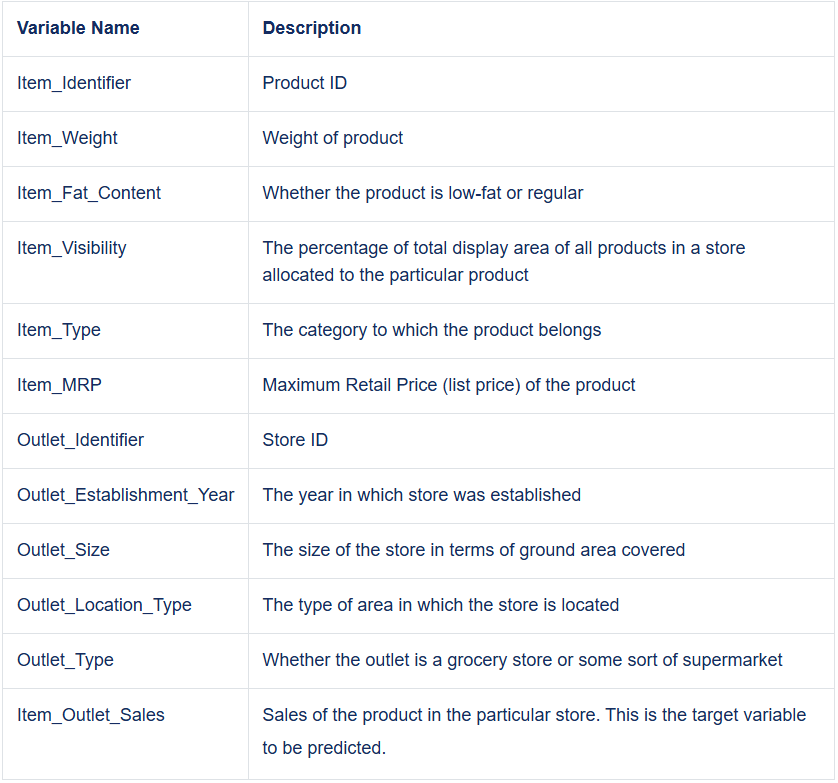


# Load and Inspect Data

In [299]:
#importing pandas and reading file
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from math import pi
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
from google.colab import files
uploaded = files.upload()

Saving Inter_24pt-Medium.ttf to Inter_24pt-Medium.ttf


In [301]:
# Download the font and give the correct path below:
font_path = "Inter_24pt-Regular.ttf"  # Adjust if you uploaded a different file
inter_font = fm.FontProperties(fname=font_path)

In [302]:
fpath="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(fpath)

In [303]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [305]:
# How many rows/columns
df.shape

(8523, 12)

*   There are 8523 rows & 12 columns


In [306]:
# What are the datatypes of each variable?
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [307]:
# Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

np.int64(0)

* There are no duplicates



In [308]:
# Identify missing values.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


* We can see that Item_Weight has 1463 missing values & Outlet_Size has 2410.

In [309]:
# Address the missing values by using a placeholder value.
#commented out for imputing with SimpleImputer later
#df["Outlet_Size"]=df["Outlet_Size"].fillna(np.nan)
#df["Item_Weight"]=df["Item_Weight"].fillna(df['Item_Weight'].mean())

In [310]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


* We can observe that all null values have been replaced with "MISSING" placeholder in Outlet_Size
* and in Item_Weight they've been replaced with column mean

In [311]:
# Find and fix any inconsistent categories of data (for example: fixing cat, Cat, and cats so that they are consistent).
# Starting by creating objects columns dataframe
cat_cols=df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [312]:
#then looping through all objects and seeing where inconsistencies lie
for col in cat_cols:
  print (f"Counts for {col}")
  print (df[col].value_counts() )
  print( "\n" )

Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OU

* We notice in Item_Fat_Content there are two many inconsistencies where "Regular" has been written as "reg" and "Low fat" as "low fat" & "LF"

In [313]:
#Fixing the inconsistencies by replacing them
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"reg": "Regular","low fat":"Low Fat", "LF": "Low Fat"})
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


* All fixed!

In [314]:
# For any numerical columns, obtain the summary statistics of each (min, max. mean).
sum_stats =  df.describe()
sum_stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

## What is the distribution of Item_Outlet_Sales

We should first check our target sanity: how skewed is it or if any extremes are found.

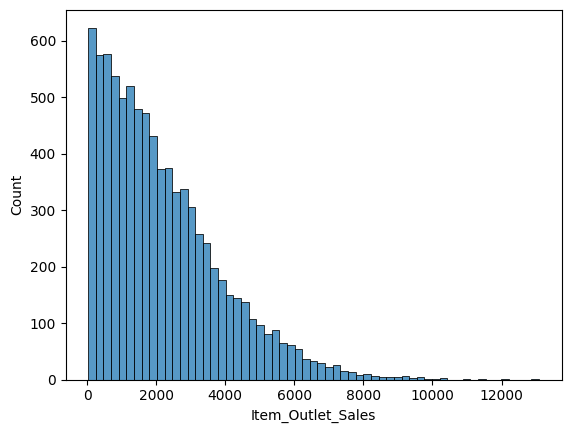

In [315]:
ax = sns.histplot(data=df, x="Item_Outlet_Sales")

The sales distribution is strongly right-skewed. Most observations lie in the lower range (roughly 0–3,500), and the frequency drops steadily as sales increase. There’s a long, thin tail extending to very high values (up to ~13,000), indicating a small number of unusually large sales.

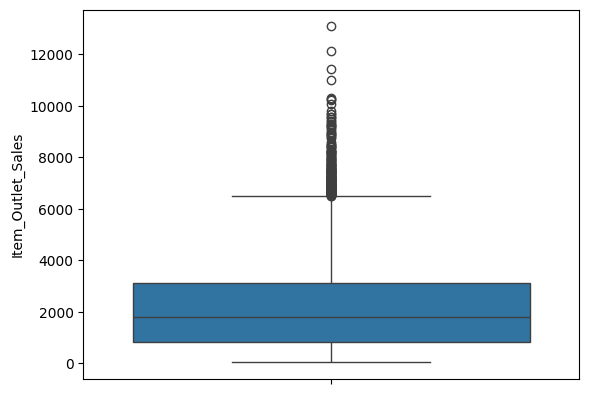

In [316]:
ax = sns.boxplot(data=df, y="Item_Outlet_Sales")

The boxplot confirms this skew. The median is around ~1,800 with an interquartile range roughly ~1,000 to ~2,900, so the “typical” sale sits near 1–3k. The upper whisker reaches ~6.5k and there are many points above it—clear high-value outliers. Overall, sales are concentrated at lower values with a handful of very large transactions driving the tail. It means our target sanity check passes!

#Numerical Features

## Numerical Features Correlation

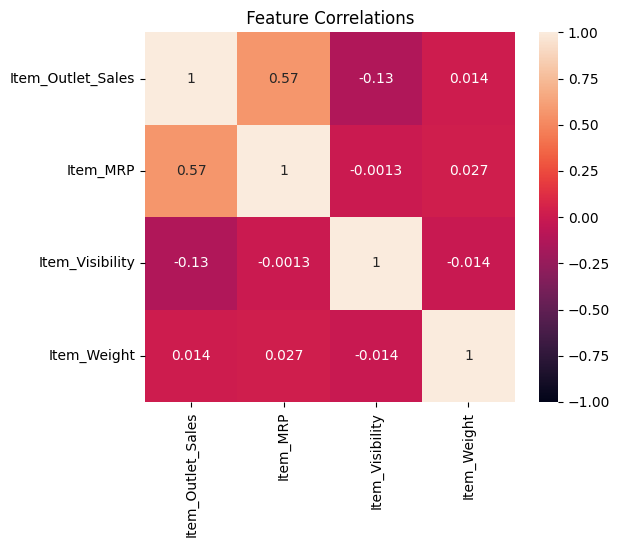

In [317]:
#use heatmap for correlation factor between the features.
num_cols = ['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility', 'Item_Weight']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, square=True)
plt.title( ' Feature Correlations ' );
plt.show()

The heatmap says that price (Item_MRP) is the only numeric feature with a clear relationship to sales (moderate positive correlation 0.57). Shelf visibility has a very weak negative link to sales (−0.13), so it might only help in certain groups or as a zero/non-zero flag. Item weight is essentially unrelated to sales (~0.01).

##How list price affect the sales

Does higher list price sell less?


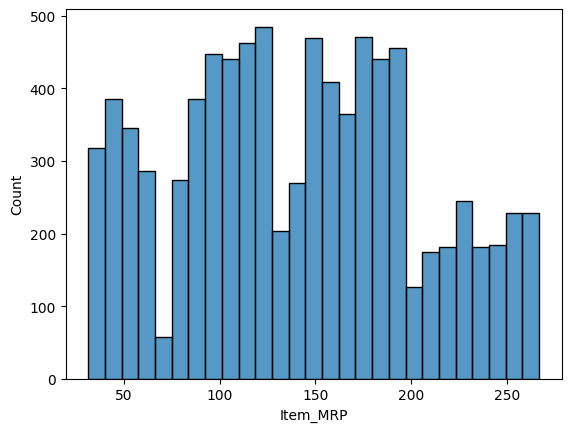

In [318]:
#first let's check distribution of MRP
ax = sns.histplot(data=df, x="Item_MRP")

Prices range roughly 30–270 and the shape is multi-peaked. You can see clear price bands (the tall bars repeat every ~40–60 units), which matches the “vertical stripes” we saw in the scatter. This means items are sold in a few common list-price tiers rather than smoothly across all prices.


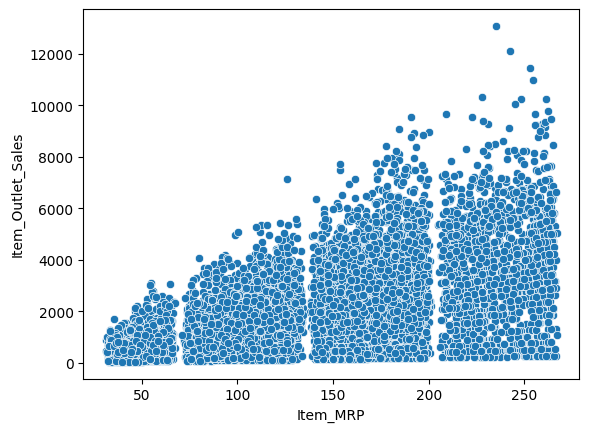

In [319]:
#Numerical vs Numerical so we should use scatter diagram
ax = sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")

As price (MRP) goes up, we see more high sales, but there’s a lot of spread at every price. The vertical “stripes” show price bands in the data. Because the cloud is dense and hard to read, we add a trend line next to see the overall direction.

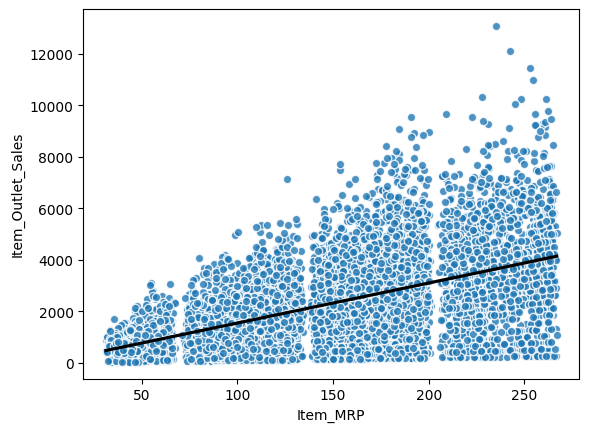

In [320]:
scatter_kws = dict(edgecolor="white")
line_kws = dict(color="black")
sns.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws=line_kws);

The line slopes up, so on average, higher price is linked to higher sales. But the points are very spread out—especially at higher prices—so one line can’t explain everything. This suggests other factors matter. Next, we color by outlet type to see if store format explains the spread.

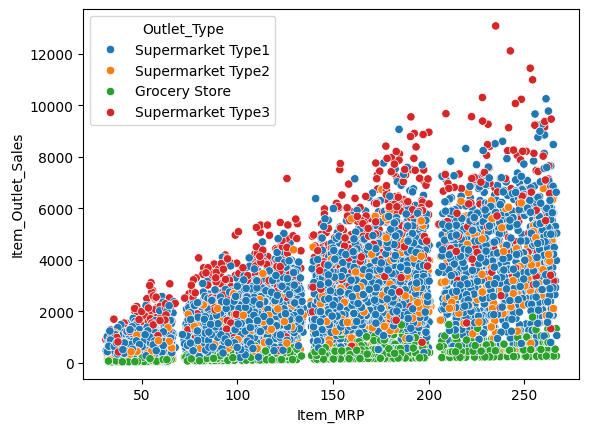

In [321]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales',hue='Outlet_Type');

Now the pattern is clearer: Grocery Stores sit low across all prices, while Supermarket types reach much higher sales, especially at high MRPs. So, the effect of price depends on outlet type. This tells us to include outlet type (and maybe its interaction with MRP) in the prediction model.

## How shelf exposure affects sales

Does more total shelf display increase product sales?

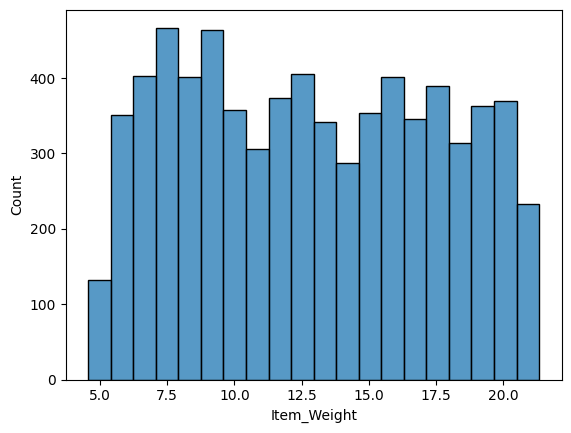

In [322]:
#again let's start with histogram for the distribution
ax = sns.histplot(data=df, x="Item_Weight")

Weights mostly fall between 5 and 21, but there’s a big spike around 12–13. That suggests many items share the same recorded weight—often a default/imputed value or a very common pack size. The rest of the distribution is fairly flat, so weight alone may not explain sales well.

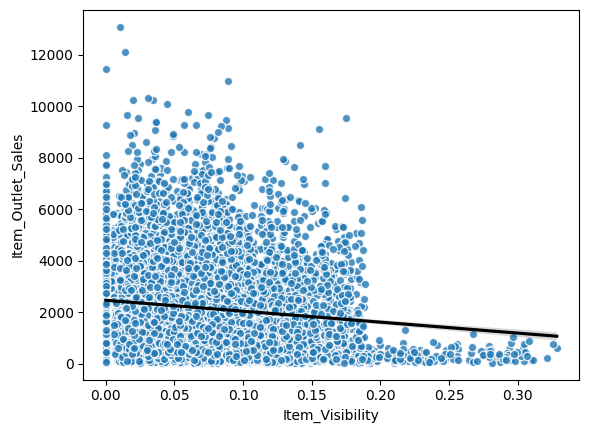

In [323]:
#also numeric vs numeric so regplot
scatter_kws = dict(edgecolor="white")
line_kus = dict(color="black")
sns.regplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws=line_kws);

This scatter shows Item_Visibility vs Item_Outlet_Sales. Most points sit near very low visibility, and the trend line tilts slightly downward, meaning higher recorded visibility is linked with slightly lower sales on average. But the cloud is very wide at every visibility level, so the relationship is weak. In short: visibility doesn’t explain sales much on its own.

#How product weight affects sales

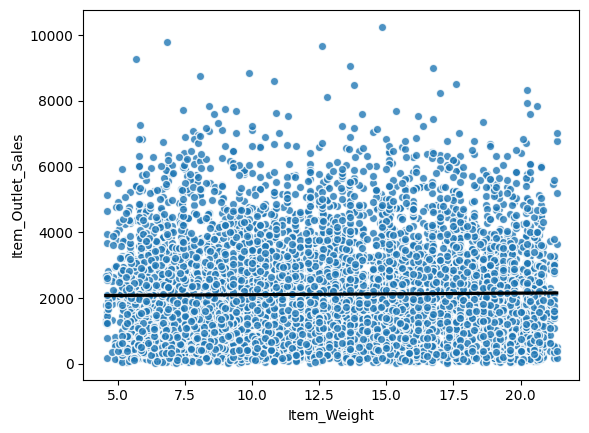

In [324]:
#also numeric vs numeric so regplot
scatter_kws = dict(edgecolor="white")
line_kws = dict(color="black")
sns.regplot(data=df, x='Item_Weight', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws=line_kws);

Sales don’t change much as weight increases. The trend line is almost flat, and there’s a wide spread of sales at every weight from ~5–20 kg, with a small spike around ~12–13 kg (common pack sizes). This suggests Item_Weight alone isn’t a strong driver of sales.

#Categorial Features

## Countplots for all our catergorial features

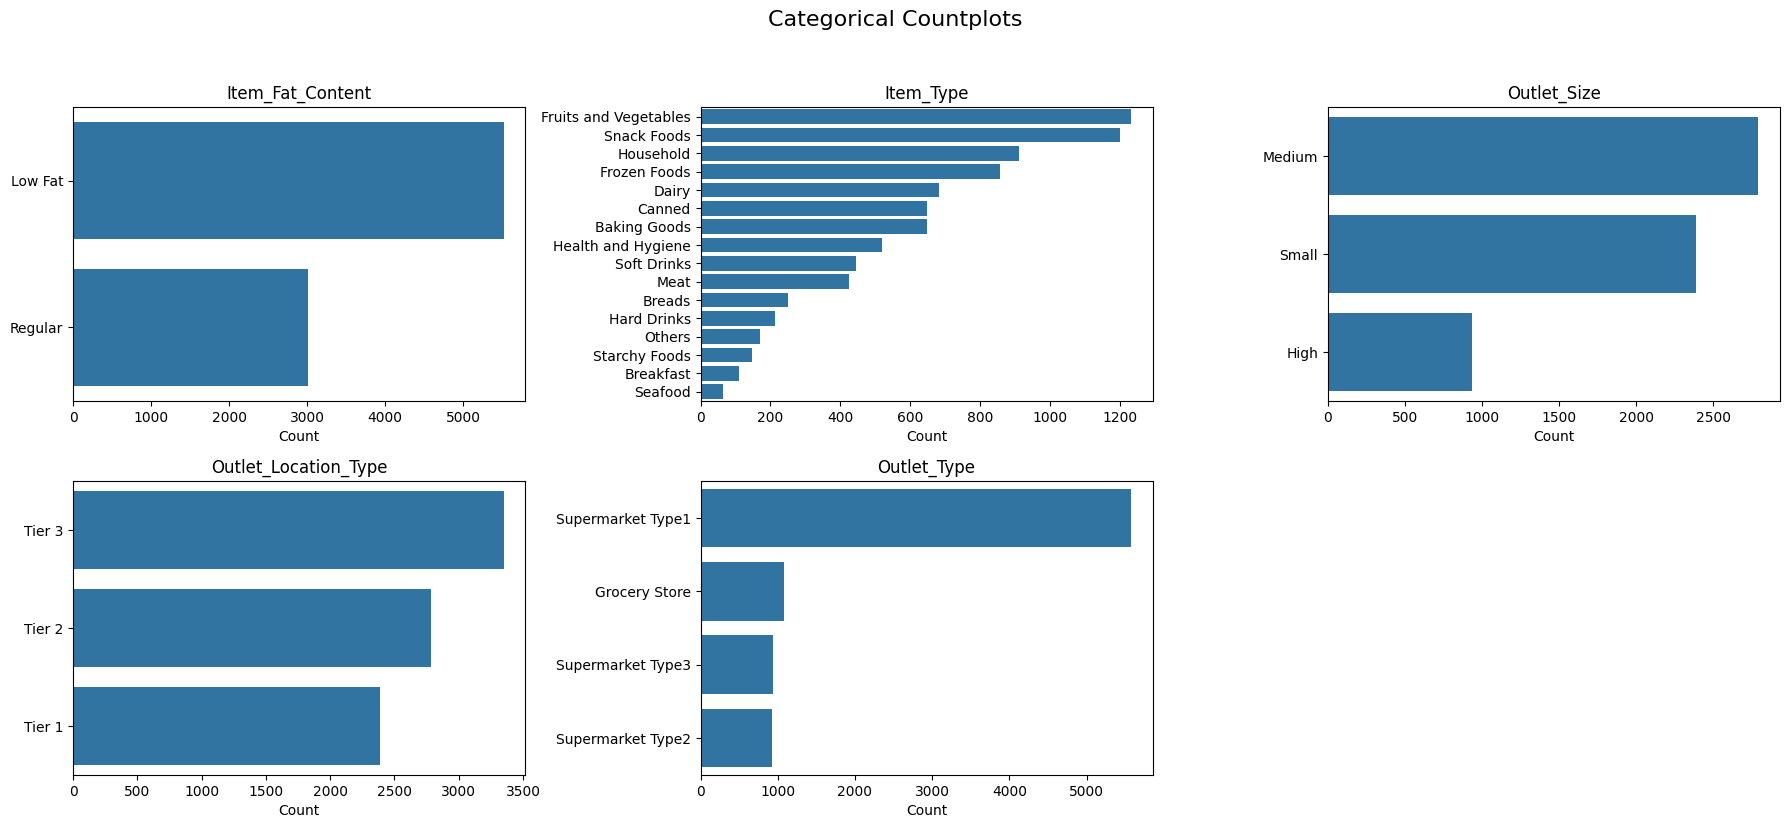

In [325]:
cats = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
ncols, nrows = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.2*nrows))
axes = axes.ravel()

for i, col in enumerate(cats):
    order = df[col].value_counts().index
    sns.countplot(data=df, y=col, order=order, ax=axes[i])
    axes[i].set_xlabel("Count"); axes[i].set_ylabel("")
    axes[i].set_title(col)

# hide any empty axes
for ax in axes[len(cats):]:
    ax.axis("off")

fig.suptitle("Categorical Countplots", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # keeps suptitle visible
plt.show()


Based on the category counts, the best features to plot against the target Item_Outlet_Sales are Outlet_Type, Outlet_Size, Outlet_Location_Type, and Item_Type. Store format (Outlet_Type) is very imbalanced and we already saw it separate sales well, so it’s the top pick. Store size and location tier likely shift footfall and capacity, so they can change typical sales levels too. Item_Type captures product mix differences that often affect demand. Item_Fat_Content has only two classes and usually shows little sales separation, so we keep it as a quick check but not a headline plot.

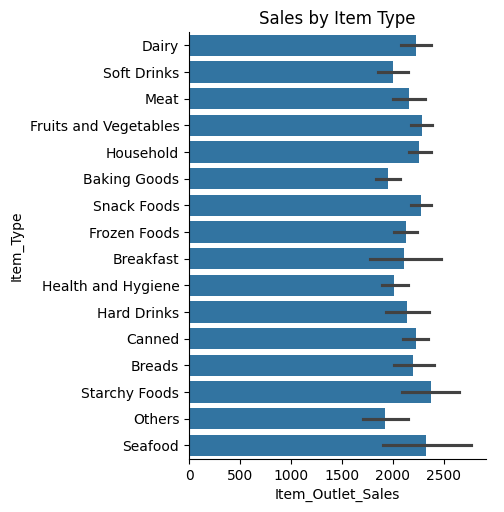

In [326]:
#barplot for Item_types
sns.catplot(data=df, y='Item_Type', x='Item_Outlet_Sales',kind='bar' ,aspect=1).set(title='Sales by Item Type');

This chart compares the average sales for each product category. Most categories sit close together (around ~1.8k–2.3k), so differences aren’t huge. A few types look higher than average—notably Starchy Foods and Seafood—while Breads, Canned, and Hard Drinks are on the lower side. Overall, item category does matter a bit, but the effect is moderate; it’s worth keeping as a feature and maybe checking with medians/boxplots or by store type to see clearer gaps.

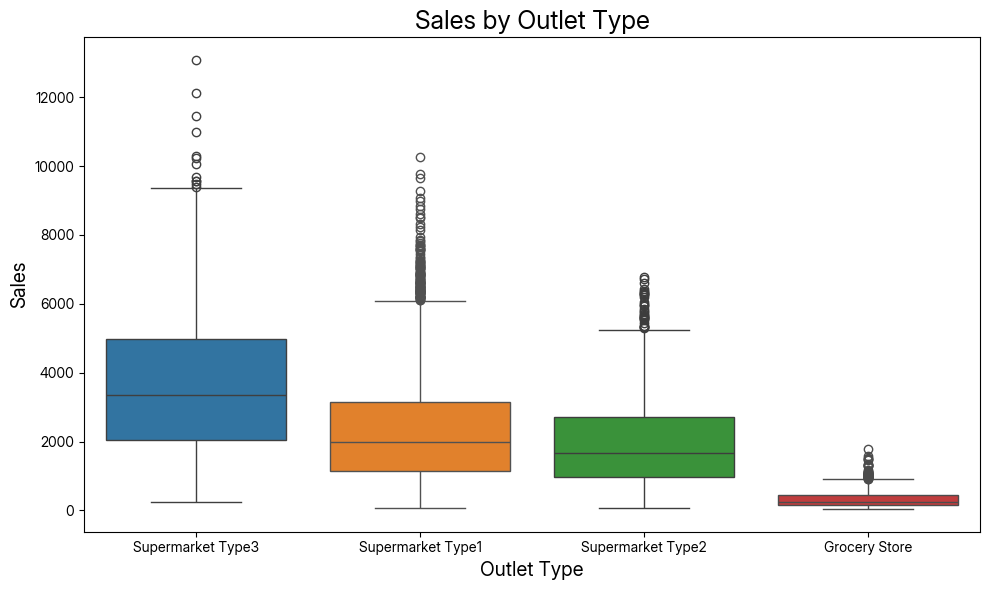

In [327]:
outlet_order = [ 'Supermarket Type3','Supermarket Type1', 'Supermarket Type2', 'Grocery Store']

fig, ax = plt.subplots(figsize=(10, 6))

for i, outlet in enumerate(outlet_order):
    sns.boxplot(
        data=df[df['Outlet_Type'] == outlet],
        y='Item_Outlet_Sales',
        x='Outlet_Type',
        ax=ax
    )
plt.title("Sales by Outlet Type", fontproperties=inter_font, fontsize=18)
plt.xlabel("Outlet Type", fontproperties=inter_font, fontsize=14)
plt.ylabel("Sales", fontproperties=inter_font, fontsize=14)
plt.xticks(fontproperties=inter_font)
plt.yticks(fontproperties=inter_font)

plt.tight_layout()
plt.show()

Supermarket Type3 has the highest typical sales (highest median) and the widest spread with many big outliers; some stores sell a lot. Supermarket Type1 and Type2 sit in the middle, while Grocery Store has the lowest median and a tight spread. This means outlet type strongly affects sales, so it’s an important feature.

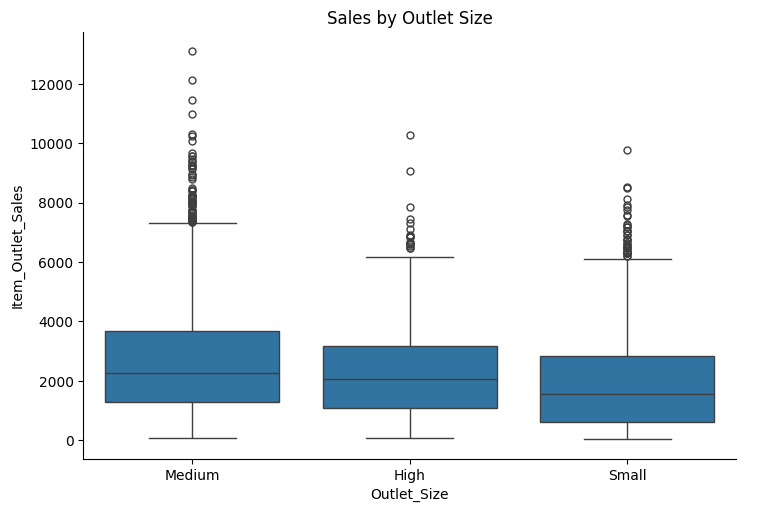

In [328]:
#boxplot for Outlet_Size
order = (df.groupby('Outlet_Size')['Item_Outlet_Sales']
           .median().sort_values(ascending=False).index)

sns.catplot( data=df, x='Outlet_Size', y='Item_Outlet_Sales', kind='box', order=order, aspect=1.5).set(title='Sales by Outlet Size');


Medium outlets have the highest typical sales (highest median). High comes next, while Small and MISSING show lower medians. All sizes have a wide spread with many high outliers, so size isn’t the only driver—but there’s a clear pattern that bigger stores tend to sell more, especially medium-sized ones. Conclusion: Outlet_Size is useful, though likely weaker than Outlet_Type; it’s worth keeping.

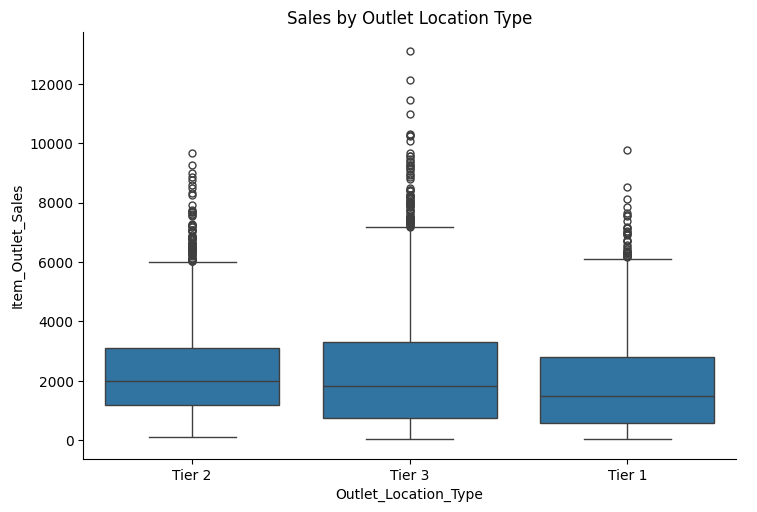

In [329]:
#boxplot for Outlet_Location_Type
order = (df.groupby('Outlet_Location_Type')['Item_Outlet_Sales']
           .median().sort_values(ascending=False).index)

sns.catplot( data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', kind='box', order=order, aspect=1.5).set(title='Sales by Outlet Location Type');


Stores in Tier 2 areas have the highest typical sales, Tier 3 is close behind, and Tier 1 has the lowest median. The boxes overlap a lot and all tiers have many high outliers, so location affects sales but the effect is moderate andweaker than Outlet_Type.

In [330]:
df['Item_Weight'].isna().sum()

np.int64(1463)

In [331]:
supermarket3_means = df[df['Outlet_Type'] == 'Supermarket Type3'][['Item_Outlet_Sales', 'Item_Weight', 'Item_MRP', 'Item_Visibility']].mean()

print(supermarket3_means)

Item_Outlet_Sales    3694.038558
Item_Weight                  NaN
Item_MRP              139.801791
Item_Visibility         0.058615
dtype: float64


## Radar Chart

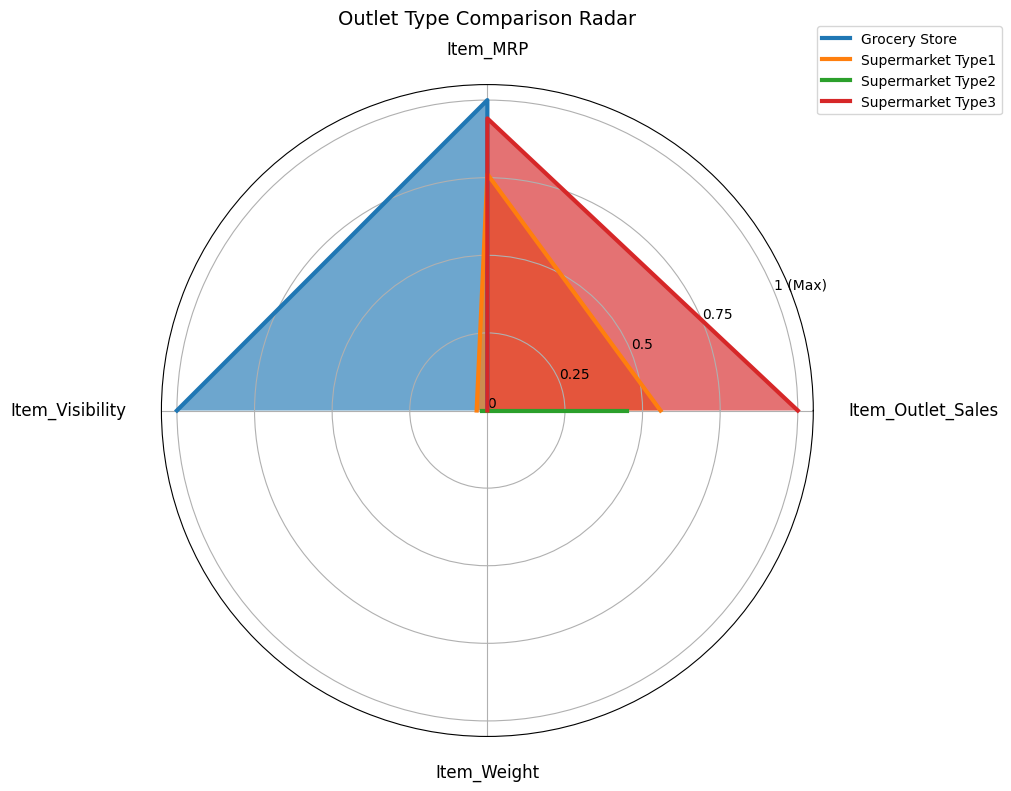

In [332]:
# Group and normalize the features for radar plot
grouped = df.groupby('Outlet_Type')[['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility', 'Item_Weight']].median()

# Normalize each feature to 0–1 range
grouped_norm = (grouped - grouped.min()) / (grouped.max() - grouped.min())

# Reset index to make 'Outlet_Type' a column
data = grouped_norm.reset_index()

# Radar chart setup
categories = list(data.columns[1:])
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # repeat first angle to close the plot

# Initialize the radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot each Outlet_Type
for i, row in data.iterrows():
    values = row.drop('Outlet_Type').tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=row['Outlet_Type'], linewidth=3)
    ax.fill(angles, values, alpha=0.65)

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Adjust padding for x-axis labels
ax.tick_params(axis='x', which='major', pad=15)

# Adjust horizontal alignment for specific labels
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle == 0:  # Item_Outlet_Sales (rightmost)
        label.set_horizontalalignment('left')
    elif angle == pi: # Item_Visibility (leftmost)
        label.set_horizontalalignment('right')
    else: # Top and bottom labels
        label.set_horizontalalignment('center')

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1 (Max)'])
plt.title('Outlet Type Comparison Radar', fontsize=14, pad=20, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


# Do note that Item_Weight is not showing as it has null values we will deal with via simple imputer

# Conclusions from our EDA

Our EDA says the strongest numeric driver of sales is price (Item_MRP): as price goes up, we see more high-sales rows (moderate positive correlation). Shelf visibility shows only a very weak negative link, and weight is basically not related to sales. On the categorical side, Outlet_Type matters a lot: Supermarket formats (especially Type3) sell the most, while Grocery Stores are lowest. Outlet_Size also helps (Medium/High stores sell more than Small/Unknown), and Outlet_Location_Type shows a smaller effect (Tier2 ≳ Tier3 > Tier1). Item_Type has moderate differences (some categories like Starchy Foods/Seafood do better, others like Breads/Canned lower). This pattern makes real-world sense: bigger, supermarket-style stores in busier areas have more footfall and assortment, so they move more units; higher-priced items often mean larger packs or premium goods, so each sale brings in more revenue; product category and store format together shape demand.

#Feature Inspection

## Inspecting: ltem_ldentifier

### Data Dictionary: Product ID

### Univariate Viz

In [333]:
# Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

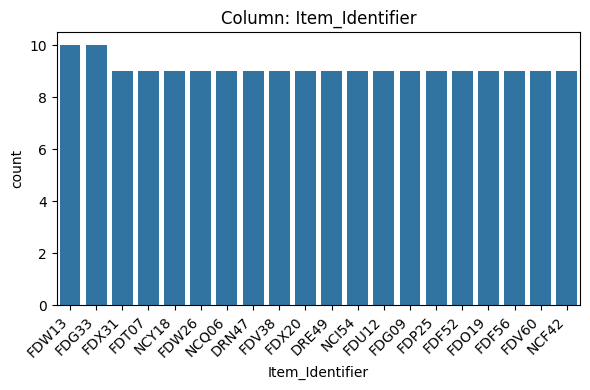

- NaN's Found: 0 (0.0%)
- Unique Values: 20
- Most common value: 'FDG33' occurs 10 times (5.49%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Identifier'}, xlabel='Item_Identifier', ylabel='count'>)

In [334]:
# Calling our custom EDA function
# Show only the top 20 Item_Identifier values
topN = 20
keep = df['Item_Identifier'].value_counts().index[:topN]
df_top = df[df['Item_Identifier'].isin(keep)].copy()

# Univariate
explore_categorical(df_top, 'Item_Identifier', order=keep)


### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + nominal
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 0 nulls so no need to impute
+ Is the feature constant or quasi-constant?
  + no
+ What is the cardinality? Is it high?
  + very high (≈ 1,559 unique IDs in 8,523 rows)
+ Would we know this BEFORE the target is determined?
  + Yes, the product ID is known at the time of sale.
+ Is there a business case/understanding reason to exclude based on our business case?  
  + Yes. It doesn’t capture behavior and can cause overfitting.

### Multivariate Viz

/tmp/ipython-input-509865976.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


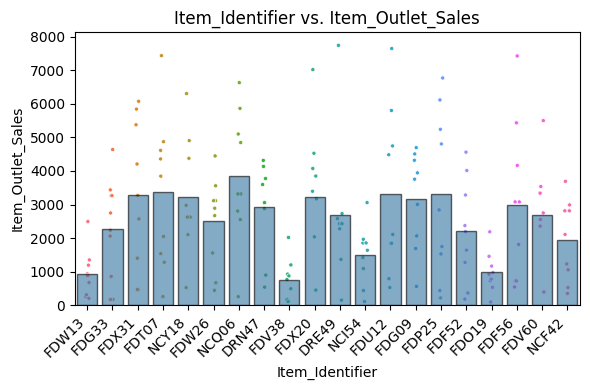

In [335]:
# Vs target
plot_categorical_vs_target(df_top, 'Item_Identifier', y='Item_Outlet_Sales', order=keep);

### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + No. Item_Identifier is a product ID. It has no inherent meaning or order, so we don’t expect it to generalize to new data.
+ Does this feature appear to be a predictor of the target?
  + No (not reliably). The plot shows wide scatter within each ID and small, inconsistent differences in the bar heights—typical of noise with many small groups. Using the raw ID would likely overfit. We should exclude it from modeling.

## Inspecting: ltem_Weight

### Data Dictionary: Weight of product

### Univariate Viz

In [336]:
# Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

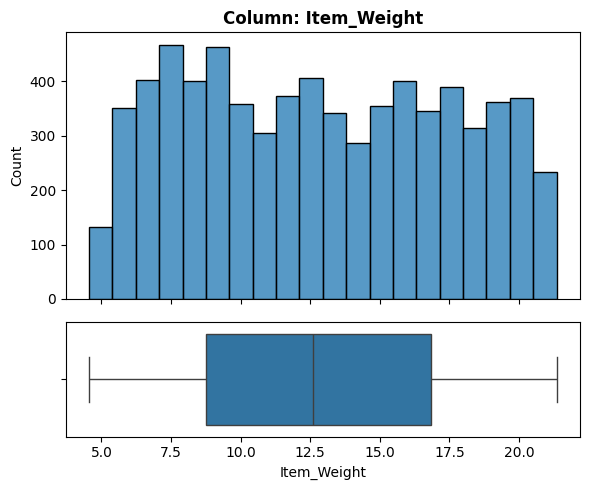

— NaN's Found: 1463 (17.17%)
— Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [337]:
# Calling our custom EDA function
explore_numeric(df, feature)


### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + numeric
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 1463 NaNs
  + we should impute with mean value becuase dropping that much of data is a huge loss and the missing values are missing at random not because of a specific reason
+ Is the feature constant or quasi-constant?
  + No
+ What is the cardinality? Is it high?
  + not applicable
+ Would we know this BEFORE the target is determined?
  + Yes, weight is a fixed attribute
+ Is there a business case/understanding reason to exclude based on our business case?  
  + No compelling reason to exclude

### Multivariate Viz

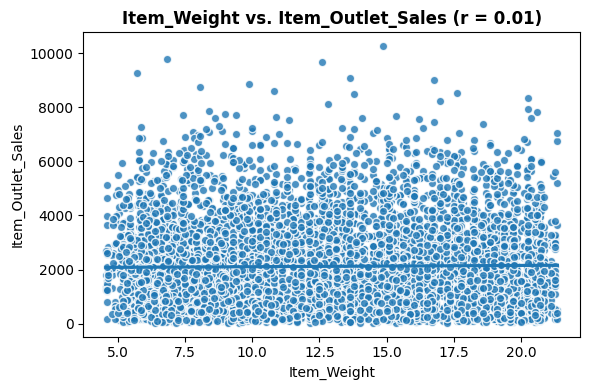

In [338]:
# Vs target
plot_numeric_vs_target(df, feature, y="Item_Outlet_Sales");

### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Any relationship is likely indirect...heavier items can mean larger packs and higher price, but price (MRP) already captures most of that.
+ Does this feature appear to be a predictor of the target?
  + Scatter shows no trend; correlation r ≈ 0.01 → does not appear to be a predictor of Item_Outlet_Sales by itself.

## Inspecting: Item_Fat_Content


### Data Dictionary: Whether the product is low-fat or regular

### Univariate Viz

In [339]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

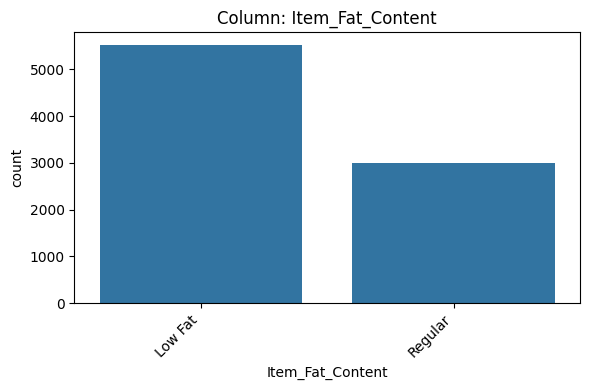

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [340]:
# Calling our custom EDA function
order = df[feature].value_counts().index
explore_categorical(df, feature, order=order)


### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + Categorical
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 0 nulls
+ Is the feature constant or quasi-constant?
  + no
+ What is the cardinality? Is it high?
  + low (2)
+ Would we know this BEFORE the target is determined?
  + Yes, it is independent of the target and observable in raw data.
+ Is there a business case/understanding reason to exclude based on our business case?  
  + No, Item_Fat_Content might influence purchasing decisions Differences in nutritional preferences could impact sales.

/tmp/ipython-input-509865976.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


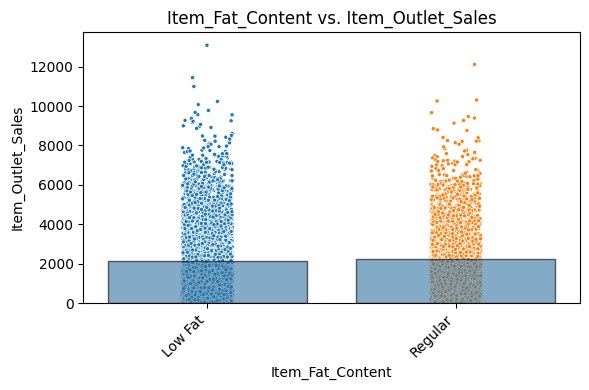

In [341]:
# Vs target
plot_categorical_vs_target(df, feature, y="Item_Outlet_Sales", order=order);

### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Yes, we might expect different fat content to affect buying behavior e.g., health-conscious customers preferring low-fat products.
+ Does this feature appear to be a predictor of the target?
  + No strong difference in target distribution between categories.

## Inspecting ltem_VisibiIity

### Data Dictionary: The percentage of total display area of all products in a store allocated to the particular product

### Univariate Viz

In [342]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

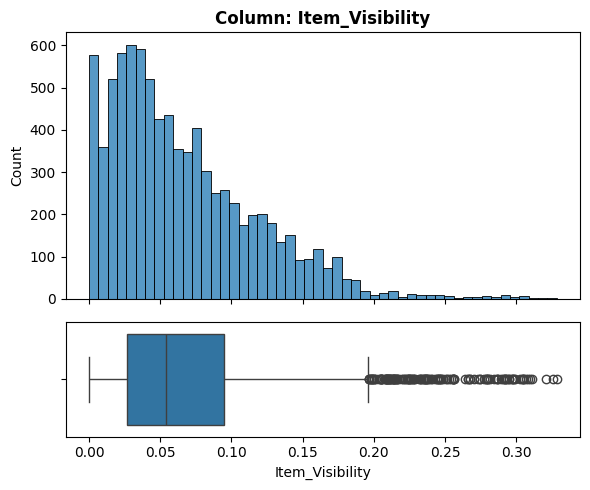

— NaN's Found: 0 (0.0%)
— Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [343]:
# Calling our custom EDA function
explore_numeric(df, feature)


### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + Numeric
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 0 nulls
+ Is the feature constant or quasi-constant?
  + no
+ What is the cardinality? Is it high?
  + not applicable
+ Would we know this BEFORE the target is determined?
  + yes
+ Is there a business case/understanding reason to exclude based on our business case?  
  + No clear reason to exclude. If anything, visibility could influence customer awareness and demand so it's worth keeping for modeling.

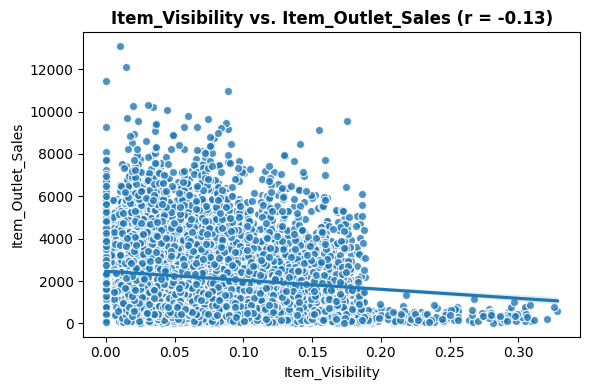

In [344]:
# Vs target
plot_numeric_vs_target(df, feature, y="Item_Outlet_Sales");


### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Yes, you'd expect that greater shelf visibility increases the chances of purchase, especially for impulse items.
+ Does this feature appear to be a predictor of the target?
  + Weakly, the correlation is slightly negative (r = -0.13), which is unexpected. This might be due to underlying patterns.

##Inspecting: ltem_Type

### Data Dictionary: The category to which the product belongs

### Univariate Viz

In [345]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

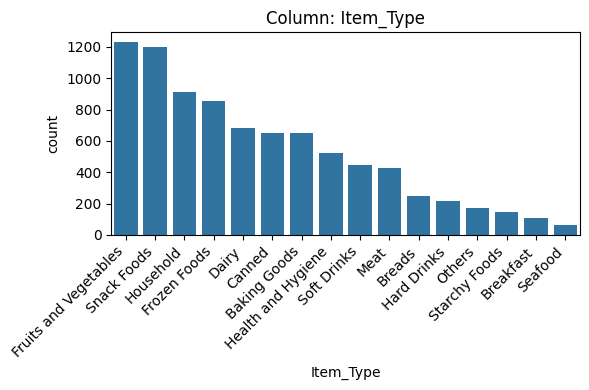

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [346]:
# Calling our custom EDA function
order = df[feature].value_counts().index
explore_categorical(df, feature, order=order)

### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + Categorical
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 0 nulls
+ Is the feature constant or quasi-constant?
  + nope
+ What is the cardinality? Is it high?
  + high (16)
+ Would we know this BEFORE the target is determined?
  + yws
+ Is there a business case/understanding reason to exclude based on our business case?  
  + no, this is relavant to sales highly

/tmp/ipython-input-509865976.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


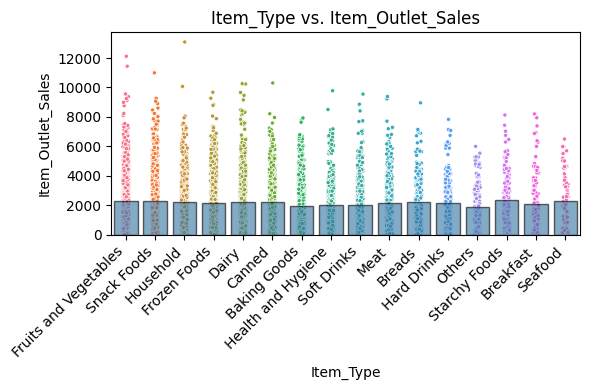

In [347]:
# Vs target
plot_categorical_vs_target(df, feature, y="Item_Outlet_Sales", order=order);

### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Yes different item types (e.g., Fruits vs. Household vs. Seafood) likely sell at different volumes and prices, so we’d expect Item_Type to influence
+ Does this feature appear to be a predictor of the target?
  + Not strongly... Although we expected some variation, the bar heights across item types are quite similar, and there's a lot of overlap in the spread.

##Inspecting ltem_MRP

### Data Dictionary: Maximum Retail Price (list price) of the product

### Univariate Viz

In [348]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

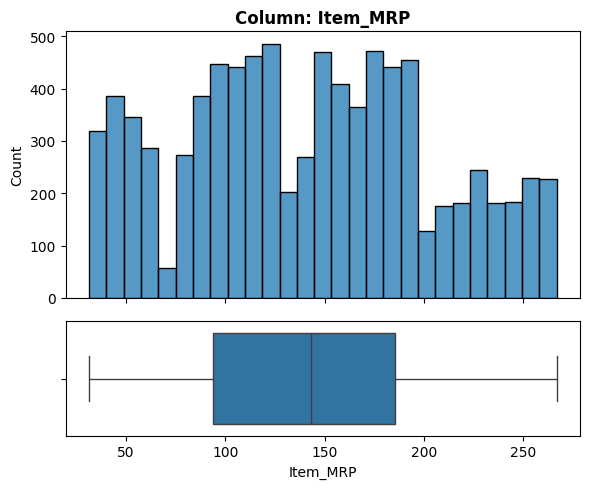

— NaN's Found: 0 (0.0%)
— Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [349]:
# Calling our custom EDA function
explore_numeric(df, feature)


### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + Numerical
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 0 nulls
+ Is the feature constant or quasi-constant?
  + nope
+ What is the cardinality? Is it high?
  + not applicable
+ Would we know this BEFORE the target is determined?
  + yes this is a product attribute
+ Is there a business case/understanding reason to exclude based on our business case?  
  + No, MRP (Maximum Retail Price) is likely a very important business driver of sales. It should be retained.

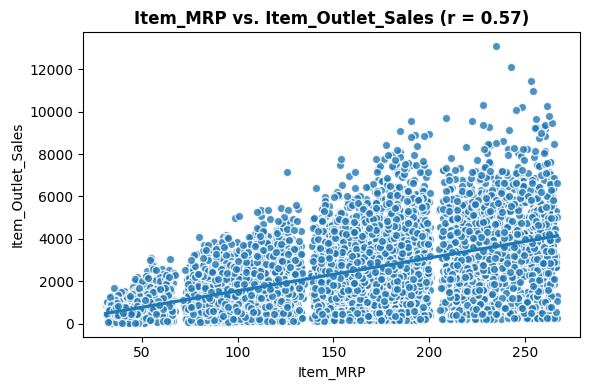

In [350]:
# Vs target
plot_numeric_vs_target(df, feature, y="Item_Outlet_Sales");


### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Yes. Price often has a significant impact on sales volume, customer purchasing decisions, and revenue.
+ Does this feature appear to be a predictor of the target?
  + Correlation r = 0.57, which is a moderate-to-strong positive correlation. The scatterplot clearly shows higher MRP values are generally associated with higher sales.

##Inspecting Outlet_ldentifier

### Data Dictionary: Store ID

### Univariate Viz

In [351]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

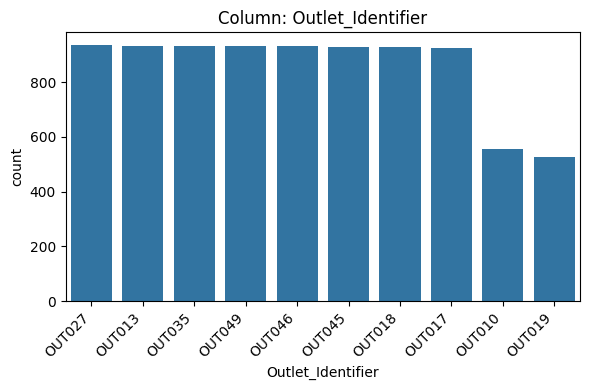

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [352]:
# Calling our custom EDA function
order = df[feature].value_counts().index

explore_categorical(df, feature, order=order)

### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + categorical
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + none
+ Is the feature constant or quasi-constant?
  + nope
+ What is the cardinality? Is it high?
  + 10 so almost high
+ Would we know this BEFORE the target is determined?
  + Yes, outlet IDs are part of the original dataset and known before sales are recorded.
+ Is there a business case/understanding reason to exclude based on our business case?  
  + No, in fact, it makes business sense to include it as different outlets may perform differently.

/tmp/ipython-input-509865976.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


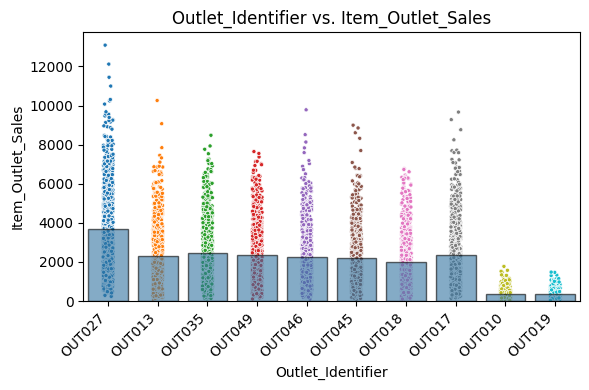

In [353]:
# Vs target
plot_categorical_vs_target(df, feature, y="Item_Outlet_Sales", order=order);


### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Yes, because outlet location/type likely influences sales performance.
+ Does this feature appear to be a predictor of the target?
  + Yes, plot shows visible differences in average sales across outlets.

##Inspecting Outlet_Establishment_Year

### Data Dictionary: The year in which store was established

### Univariate Viz

In [354]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype


dtype('int64')

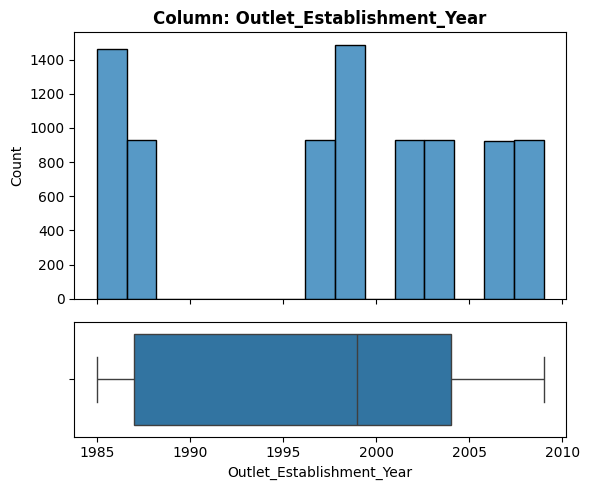

— NaN's Found: 0 (0.0%)
— Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [355]:
# Calling our custom EDA function
explore_numeric(df, feature)


### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + numeric
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 0 nulls
+ Is the feature constant or quasi-constant?
  + No
+ What is the cardinality? Is it high?
  + not applicable
+ Would we know this BEFORE the target is determined?
  + yes
+ Is there a business case/understanding reason to exclude based on our business case?  
  + No, may relate to outlet maturity...

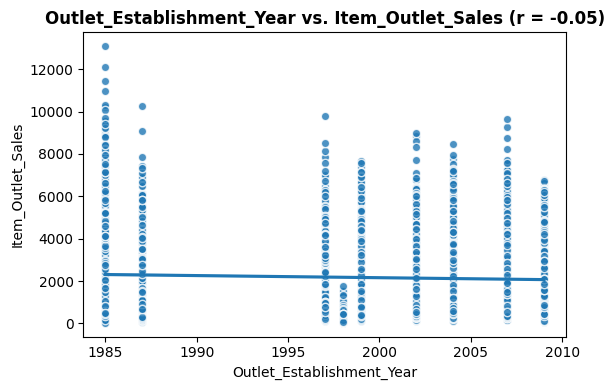

In [356]:
# Vs target
plot_numeric_vs_target(df, feature, y="Item_Outlet_Sales");

### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Maybe because older outlets might sell more
+ Does this feature appear to be a predictor of the target?
  + Weak correlation (r = -0.05), not strongly predictive

##Inspecting Outlet__Size


### Data Dictionary: The size of the store in terms of ground area covered

### Univariate Viz

In [357]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

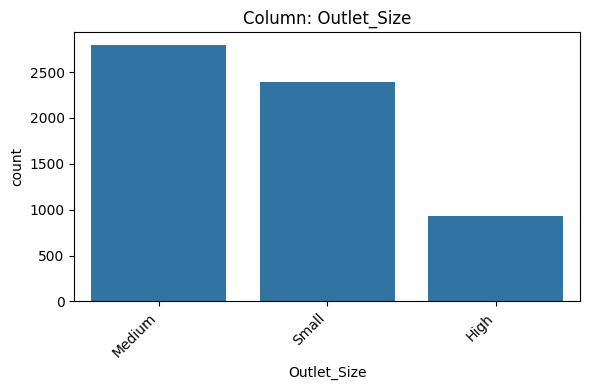

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [358]:
# Calling our custom EDA function
order = df[feature].value_counts().index
explore_categorical(df, feature, order=order)

### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + ordinal
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + 2410 (28.28%) nulls we should impute using mode ('Medium')
+ Is the feature constant or quasi-constant?
  + no
+ What is the cardinality? Is it high?
  + low (4)
+ Would we know this BEFORE the target is determined?
  + yes
+ Is there a business case/understanding reason to exclude based on our business case?  
  + no size could infulence the sales

/tmp/ipython-input-509865976.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


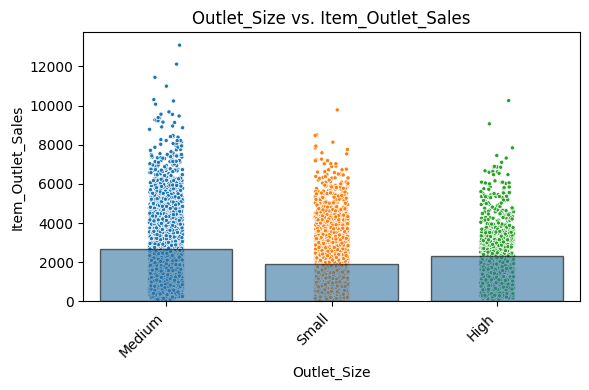

In [359]:
# Vs target
plot_categorical_vs_target(df, feature, y="Item_Outlet_Sales", order=order);


### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + yes somewhat
+ Does this feature appear to be a predictor of the target?
  + slightly as there is small variation between bars

##Inspecting Outlet_Location_Type

### Data Dictionary: The type of area in which the store is located

### Univariate Viz

In [360]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

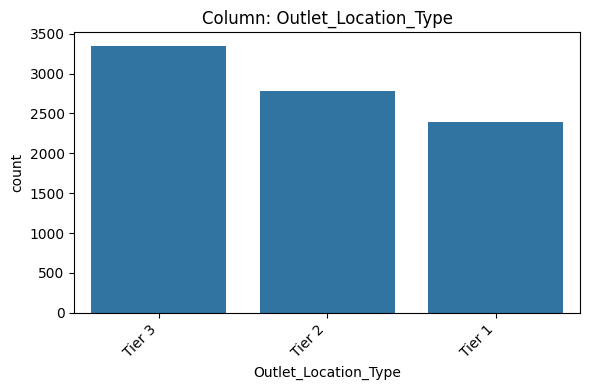

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [361]:
# Calling our custom EDA function
order = df[feature].value_counts().index
explore_categorical(df, feature, order=order)


### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + nominal
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + none
+ Is the feature constant or quasi-constant?
  + no
+ What is the cardinality? Is it high?
  + low (3)
+ Would we know this BEFORE the target is determined?
  + yes
+ Is there a business case/understanding reason to exclude based on our business case?  
  + no the location could influence the sales

/tmp/ipython-input-509865976.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


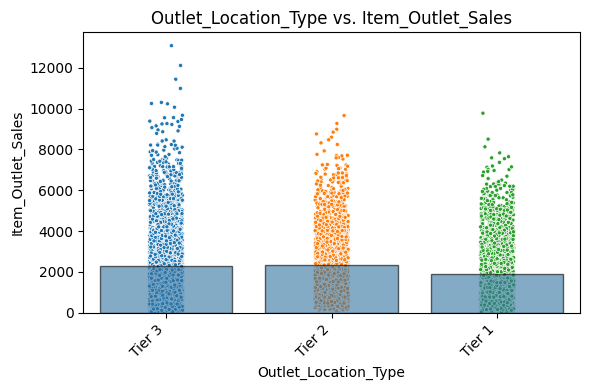

In [362]:
# Vs target
plot_categorical_vs_target(df, feature, y="Item_Outlet_Sales", order=order);


### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Yes, location tier could impact foot traffic and sales due to differences in urban vs rural customer volume.
+ Does this feature appear to be a predictor of the target?
  + Somewhat...Tier 3 outlets seem to have slightly higher sales, but differences are not dramatic

##Inspecting Outlet_Type

### Data Dictionary: Whether the outlet is a grocery store or some sort of supermarket

### Univariate Viz

In [363]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

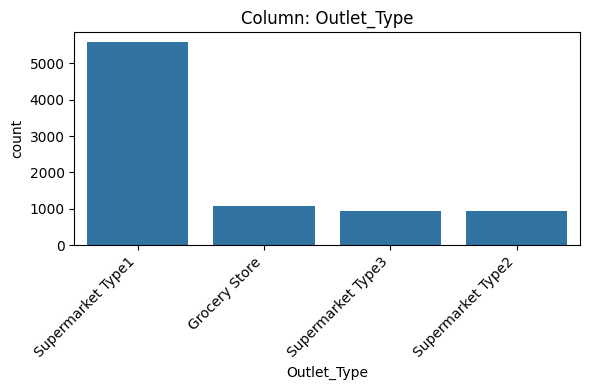

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [364]:
# Calling our custom EDA function
order = df[feature].value_counts().index
explore_categorical(df, feature, order=order)

### Feature Observation

+ What type of feature is it?(Categorical (nominal). ordinal, numeric)
  + nominal
+ How many null values? What percentage? What would you do with the null values (drop the
rows? drop the column? impute? if impute, with what?)
  + none
+ Is the feature constant or quasi-constant?
  + no
+ What is the cardinality? Is it high?
  + low (4)
+ Would we know this BEFORE the target is determined?
  + yes
+ Is there a business case/understanding reason to exclude based on our business case?  
  + no this feature could be highly telling about sales

/tmp/ipython-input-509865976.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


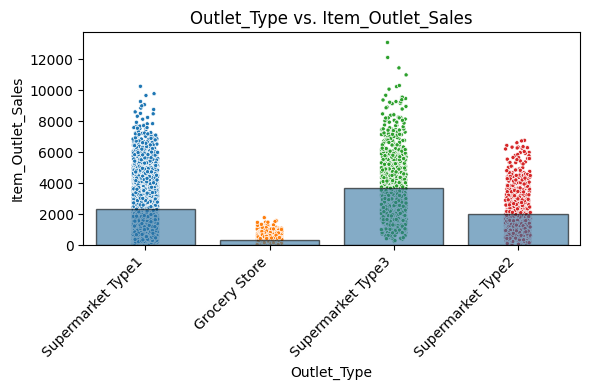

In [365]:
# Vs target
plot_categorical_vs_target(df, feature, y="Item_Outlet_Sales", order=order);


### Feature vs. Target Observations

+ Based on your business understanding, would you expect this feature to be a predictor of
the target?
  + Definitely yes because different outlet types (e.g., grocery vs supermarket) cater to different customer behaviors and capacities.
+ Does this feature appear to be a predictor of the target?
  + Yes. Grocery Stores have clearly lower sales, while Supermarket Type 3 has noticeably higher sales.

# Preprocessing for Machine Learning

##imports for preprocessing


In [366]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')

In [367]:
#dropping Item_Identifier due to high cardinality
df=df.drop(columns=['Item_Identifier'])


Define features (X) and target (y).

In [368]:
# Define features (X) and target (y).
# X should include every feature except: 'ltem_Outlet_Sales"
# y should be 'Rating of cereal'

target = 'Item_Outlet_Sales'
X = df.drop(columns="Item_Outlet_Sales")
y = df[target]

Train test split the data to prepare for machine learning.

In [369]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Identify each feature as numerical, ordinal, or nominal.

In [370]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


In [371]:
# Checking object columns
X_train.select_dtypes('object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [372]:
X_train["Item_Fat_Content"].value_counts(dropna=False)

,count
Item_Fat_Content,
Low Fat,4129
Regular,2263


In [373]:
X_train['Item_Type'].value_counts(dropna=False)

,count
Item_Type,
Fruits and Vegetables,948
Snack Foods,906
Household,695
Frozen Foods,632
Dairy,507
Canned,481
Baking Goods,478
Health and Hygiene,390
Soft Drinks,331


In [374]:
X_train["Outlet_Identifier"].value_counts(dropna=False)

,count
Outlet_Identifier,
OUT027,723
OUT035,709
OUT018,704
OUT045,699
OUT017,698
OUT046,695
OUT013,689
OUT049,676
OUT010,415


In [375]:
X_train["Outlet_Size"].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2103
NaN,1812
Small,1788
High,689


In [376]:
X_train["Outlet_Location_Type"].value_counts(dropna=False)

,count
Outlet_Location_Type,
Tier 3,2531
Tier 2,2106
Tier 1,1755


In [377]:
X_train["Outlet_Type"].value_counts(dropna=False)

,count
Outlet_Type,
Supermarket Type1,4166
Grocery Store,799
Supermarket Type3,723
Supermarket Type2,704


#### Features:

- Ordinal: Outlet_Size
- Categorical: Item_Fat_Content, Item_Type, Outlet_Identifier Outlet_Location_Type and	Outlet_Type
- The remaining features are numeric.

I will create 3 pipelines (one for numeric, ordinal, and categorical features).

For the numeric features/pipeline I will:

- Impute null values using SImpleImputer using the ‘mean’ strategy.
- Scale the data with StandardScaler.

For categorical (nominal) pipeline:

- Impute null values using SimpleImputer using the ‘constant’ strategy with a fill value of "MISSING."

- Use OneHotEncoder to encode the features.
  - Be sure to include the arguments: sparse_output=False AND handle_unknown='ignore' when creating the OneHotEncoder.


For the ordinal pipeline:
- Impute null values using SimpleImputer using the "most_frequent" strategy.
- Use OrdinalEncoder to encode the "Outlet_Size" column.
- Scale the ordinal features using StandardScaler

### Pipelines

In [378]:
# Prepare ordinal pipeline
ord_cols = ["Outlet_Size"]

# Impute Most common
impute_common = SimpleImputer(strategy='most_frequent')

# Ordinal Encoder
size_order = ['Small','Medium','High']
ord_encoder = OrdinalEncoder(categories=[size_order])

# Scaler
scaler = StandardScaler()

# make a pipeline
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [379]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [380]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### ColumnTransformer

Create a tuple for each pipeline

In [381]:
#tuple= (name, pipeline, feature_list).
num_tuple = ('numeric', numeric_pipe, num_cols)
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ord_tuple = ('ordinal', ord_pipe, ord_cols)

Instantiate ColumnTransformer with all tuples.

In [382]:
col_transformer = ColumnTransformer(
    [num_tuple, ord_tuple, ohe_tuple],
    verbose_feature_names_out=False
)

Fit on training data only.

In [383]:
col_transformer.fit(X_train)



ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

Transform both training and test data.

In [384]:
X_train_processed = col_transformer.transform(X_train)
X_train_processed.head(20).round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.82,-0.71,1.83,1.33,0.29,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.56,-1.29,0.60,1.33,0.29,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.13,1.81,0.24,0.14,0.29,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.17,-1.00,-0.95,0.73,-1.38,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.53,-0.97,-0.34,0.49,0.29,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4377,0.00,-0.11,-0.51,-1.53,-1.38,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2280,1.88,-0.07,-0.86,0.73,-1.38,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8198,0.00,-0.05,1.94,-1.53,0.29,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7514,1.61,1.85,1.80,0.73,-1.38,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3463,-1.12,-0.53,-0.42,0.73,-1.38,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [385]:
X_test_processed = col_transformer.transform(X_test)
X_test_processed.head().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.33,-0.78,-1.00,-1.29,1.96,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.18,0.10,-1.59,-0.10,-1.38,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.38,-0.48,-1.60,0.14,0.29,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,0.00,-0.42,0.51,-1.53,0.29,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-0.64,-1.05,0.89,0.73,-1.38,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Machine Learning Models

##Linear Regression Model

In [386]:
# Import and instantiate model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Fit model on training data
lin_reg.fit(X_train_processed, y_train)

# Predictions
y_pred_train = lin_reg.predict(X_train_processed)
y_pred_test = lin_reg.predict(X_test_processed)

# Evaluate
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.136
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.715
- RMSE = 1,092.863
- R^2 = 0.567


### Overfitting vs. Underfitting Analysis for Linear Regression

**Training R² = 0.562**

**Test R² = 0.567**

Comparison:

* The training and test R² scores are very close (both ~0.56).

* This indicates the model is not overfitting (it does not perform much better on training than on test).

* At the same time, the R² values are only moderate (explaining about 56–57% of the variance).

Conclusion:

* The model is not overfit, because training and test performance are almost identical.

* It is also not severely underfit, but it has limited predictive power (R² ~0.56 means nearly half the variation in prices is still unexplained).

* This suggests the model is adequately fit, but too simple to capture all relationships.

##Random Forest Model

In [387]:
# Import and instantiate model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Fit model on training data
rf.fit(X_train_processed, y_train)

# Predictions
y_pred_train = rf.predict(X_train_processed)
y_pred_test = rf.predict(X_test_processed)

# Evaluate
evaluate_regression(rf, X_train_processed, y_train, X_test_processed, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.372
- MSE = 182,847.683
- RMSE = 427.607
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 766.319
- MSE = 1,214,631.657
- RMSE = 1,102.103
- R^2 = 0.560


### Overfitting vs. Underfitting Analysis for Random Forest

**Training R² = 0.938**

**Test R² = 0.560**

Comparison:

* The training performance is very high (R² ~0.94, excellent fit).

* The test performance drops sharply to R² ~0.56.

* This gap shows that the model learned the training data extremely well but fails to generalize to unseen data.

Conclusion:

* The model is overfit.

* It memorizes patterns (and noise) in the training set but struggles to make accurate predictions on the test set.

###Comparison Between the Two Models

Comparison

* MAE (lower is better): Random Forest is slightly better (766 vs. 804).

* RMSE (lower is better): Linear Regression is slightly better (1,093 vs. 1,102).

* R² (higher is better): Linear Regression is slightly better (0.567 vs. 0.560).

Conclusion

* The two models perform very similarly on the test set.

* Linear Regression edges out Random Forest in terms of R² and RMSE, meaning it explains slightly more variance and makes more stable predictions.

* Random Forest has a lower MAE, meaning its typical absolute error is a bit smaller.

* Overall, Linear Regression is the stronger test performer here, though the difference is minor.

##Random Forest Tuned

In [388]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [392]:
# Define parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 100,150],
    'max_depth': [None, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4]}

# Instantiate GridSearchCV with 2-fold CV to save time
gridsearch = GridSearchCV(RandomForestRegressor(random_state=42),param_grid,cv=2 , n_jobs=-1,verbose=1)

# Fit the gridsearch on training data
gridsearch.fit(X_train_processed, y_train)

# Best parameters
print("Best Parameters:", gridsearch.best_params_)

# Define best model (already refit)
best_rf = gridsearch.best_estimator_

# Evaluate tuned Random Forest
evaluate_regression(best_rf, X_train_processed, y_train, X_test_processed, y_test)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 150}
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 660.698
- MSE = 888,734.990
- RMSE = 942.727
- R^2 = 0.700

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 733.825
- MSE = 1,111,659.728
- RMSE = 1,054.353
- R^2 = 0.597


###Comparison Between the Default & Tuned Model

Training performance dropped: R² fell from 0.938 → 0.766, RMSE got worse.

Testing performance improved slightly: R² improved from 0.560 → 0.597, RMSE improved a bit (1,102 → 1,054).

Interpretation:

* The default model was overfit (very high training score, much lower test score).

* The tuned model reduced overfitting by enforcing constraints (max_depth=16, min_samples_leaf=4).

* This caused the training performance to drop but helped the test performance improve, which means the tuned model generalizes better.

##Evaluation

**Recommended Model: Tuned Random Forest**

Justification:

* Linear Regression had weaker performance overall (R² ≈ 0.56).

* Bagged Trees overfit badly (Train R² ≈ 0.93, Test R² ≈ 0.84).

* Default Random Forest also overfit (Train R² ≈ 0.94, Test R² ≈ 0.56).

* Tuned Random Forest balanced the trade-off better (Train R² ≈ 0.77, Test R² ≈ 0.60).

The tuned Random Forest sacrifices some training accuracy but improves test performance and reduces overfitting, making it the most reliable choice for deployment.

**Stakeholders Analysis**

Model Recommendation: **Tuned Random Forest**

Our final model explains about 60% of the variation in housing prices (R² = 0.60). In simple terms, this means the model captures more than half of the important patterns in the data, but some variation remains due to factors not included in our dataset (for example, market trends or neighborhood appeal).

Looking at error metrics, the model’s Root Mean Squared Error (RMSE) is ~1,054. This tells us that, on average, the model’s predictions are off by about 1,000 units of price. I chose RMSE because it penalizes larger mistakes more heavily, which is important for stakeholders... it shows not just the “average error” but highlights the risk of big misses.

Comparing training and test performance:

Training R² = 0.77

Test R² = 0.60

This gap shows that the model fits the training data better than the test data, but the difference is not extreme. This indicates some overfitting, but much less than the default Random Forest. The tuned model should generalize more reliably to new, unseen data.
